## **Task 2--Linear Regression with Python Scikit Learn**

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


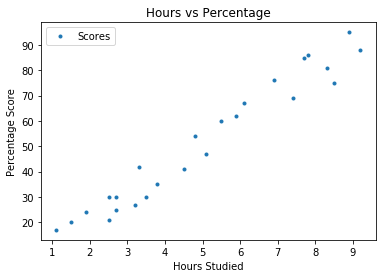

In [8]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='.')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Preparing the data**

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [16]:
print(X.shape)
print(y)

(25, 1)
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [19]:
! pip install scikit-learn
from sklearn.model_selection import train_test_split as tt 
X_train, X_test, y_train, y_test = tt(X, y, test_size=0.2, random_state=0) 

You should consider upgrading via the 'c:\users\sambasivarao ch\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


### **Training the Algorithm**

In [21]:
from sklearn.linear_model import LinearRegression  
Lr = LinearRegression()  
Lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


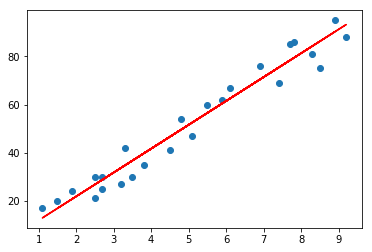

In [23]:
# Plotting the regression line
line = Lr.coef_*X+Lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, 'red');
plt.show()

###  Predictions

In [24]:
print(X_test) # Testing data - In Hours
y_hat = Lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [31]:
# You can also test with your own data
hours = 9.25
model_pred = Lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(model_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_hat)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_hat)) 

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217413
